# Data Preprocessing

In [394]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import kagglehub

In [395]:
#determine encoding of dataset
import chardet

with open('/content/Global YouTube Statistics.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7296172838889748, 'language': ''}


In [396]:
#upload dataset
youtube_data = '/content/Global YouTube Statistics.csv'
df = pd.read_csv('/content/Global YouTube Statistics.csv',  encoding='ISO-8859-1',index_col=0)

In [397]:
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 1 to 995
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   subscribers                              995 non-null    int64  
 2   video views                              995 non-null    float64
 3   category                                 949 non-null    object 
 4   Title                                    995 non-null    object 
 5   uploads                                  995 non-null    int64  
 6   Country                                  873 non-null    object 
 7   Abbreviation                             873 non-null    object 
 8   channel_type                             965 non-null    object 
 9   video_views_rank                         994 non-null    float64
 10  country_rank                             879 non-null  

In [399]:
#drop rows with null values & unnecessary columns
df = df.dropna()
df = df.drop(columns=['Youtuber','country_rank','created_year','Unemployment rate','Country','Title','category','Longitude', 'Latitude','Gross tertiary education enrollment (%)','Population','channel_type_rank','Urban_population', 'created_month','created_date','video_views_rank'],errors='ignore')
df.rename(columns={'Abbreviation': 'Country_Abr'}, inplace=True) #change Abbreviation column name to Country_Abr
df = df[(df != 0).all(axis=1)]

In [400]:
df.head()

,subscribers,video views,uploads,Country_Abr,channel_type,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days
rank,,,,,,,,,,,
1,245000000,2.280000e+11,20082,IN,Music,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0
3,166000000,2.836884e+10,741,US,Entertainment,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0
4,162000000,1.640000e+11,966,US,Education,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0
5,159000000,1.480000e+11,116536,IN,Entertainment,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0
9,106000000,9.047906e+10,493,RU,People,4.894700e+07,12200.0,195800.0,146800.0,2300000.0,100000.0


# Exploratory Data Analysis

In [401]:
#find mean highest yearly earning
df['highest_yearly_earnings'].mean()

10323449.448339483

In [402]:
#find median highest yearly earning
df['highest_yearly_earnings'].median()

5500000.0

In [403]:
#find min highest yearly earning
df['highest_yearly_earnings'].min()

2.0

In [404]:
#find max highest yearly earning
df['highest_yearly_earnings'].max()

110600000.0

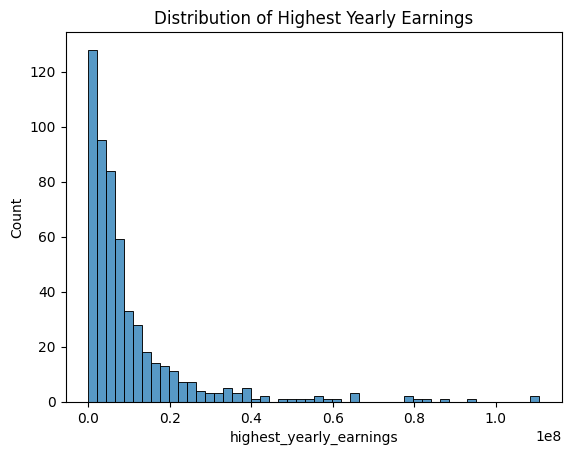

In [405]:
#find the distrubution of target variable (highest yearly earning)
sns.histplot(data = df, x = 'highest_yearly_earnings')
plt.title('Distribution of Highest Yearly Earnings')
plt.show()

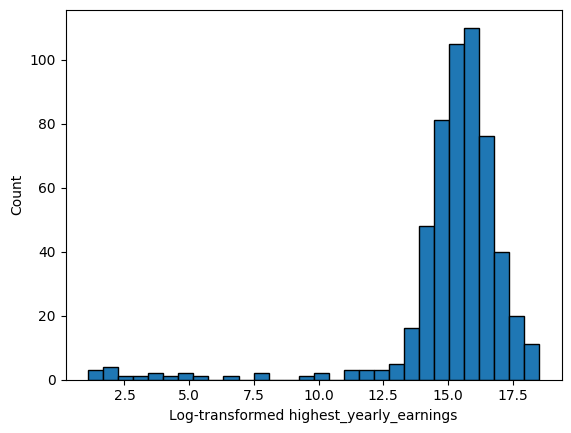

In [421]:
# Apply log transformation
df['log_earnings'] = np.log(df['highest_yearly_earnings'] + 1)

# Plot the new distribution
plt.hist(df['log_earnings'], bins=30, edgecolor='k')
plt.xlabel("Log-transformed highest_yearly_earnings")
plt.ylabel("Count")
plt.show()

## Distribution of features

In [422]:
#find numercial features for analyzing features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#remove target column
num_features.remove('highest_yearly_earnings')
print("Numerical Features:", num_features)

#find categorical features for analyzing features
cat_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", cat_features)

Numerical Features: ['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'subscribers_for_last_30_days', 'log_earnings']
Categorical Features: ['Country_Abr', 'channel_type']


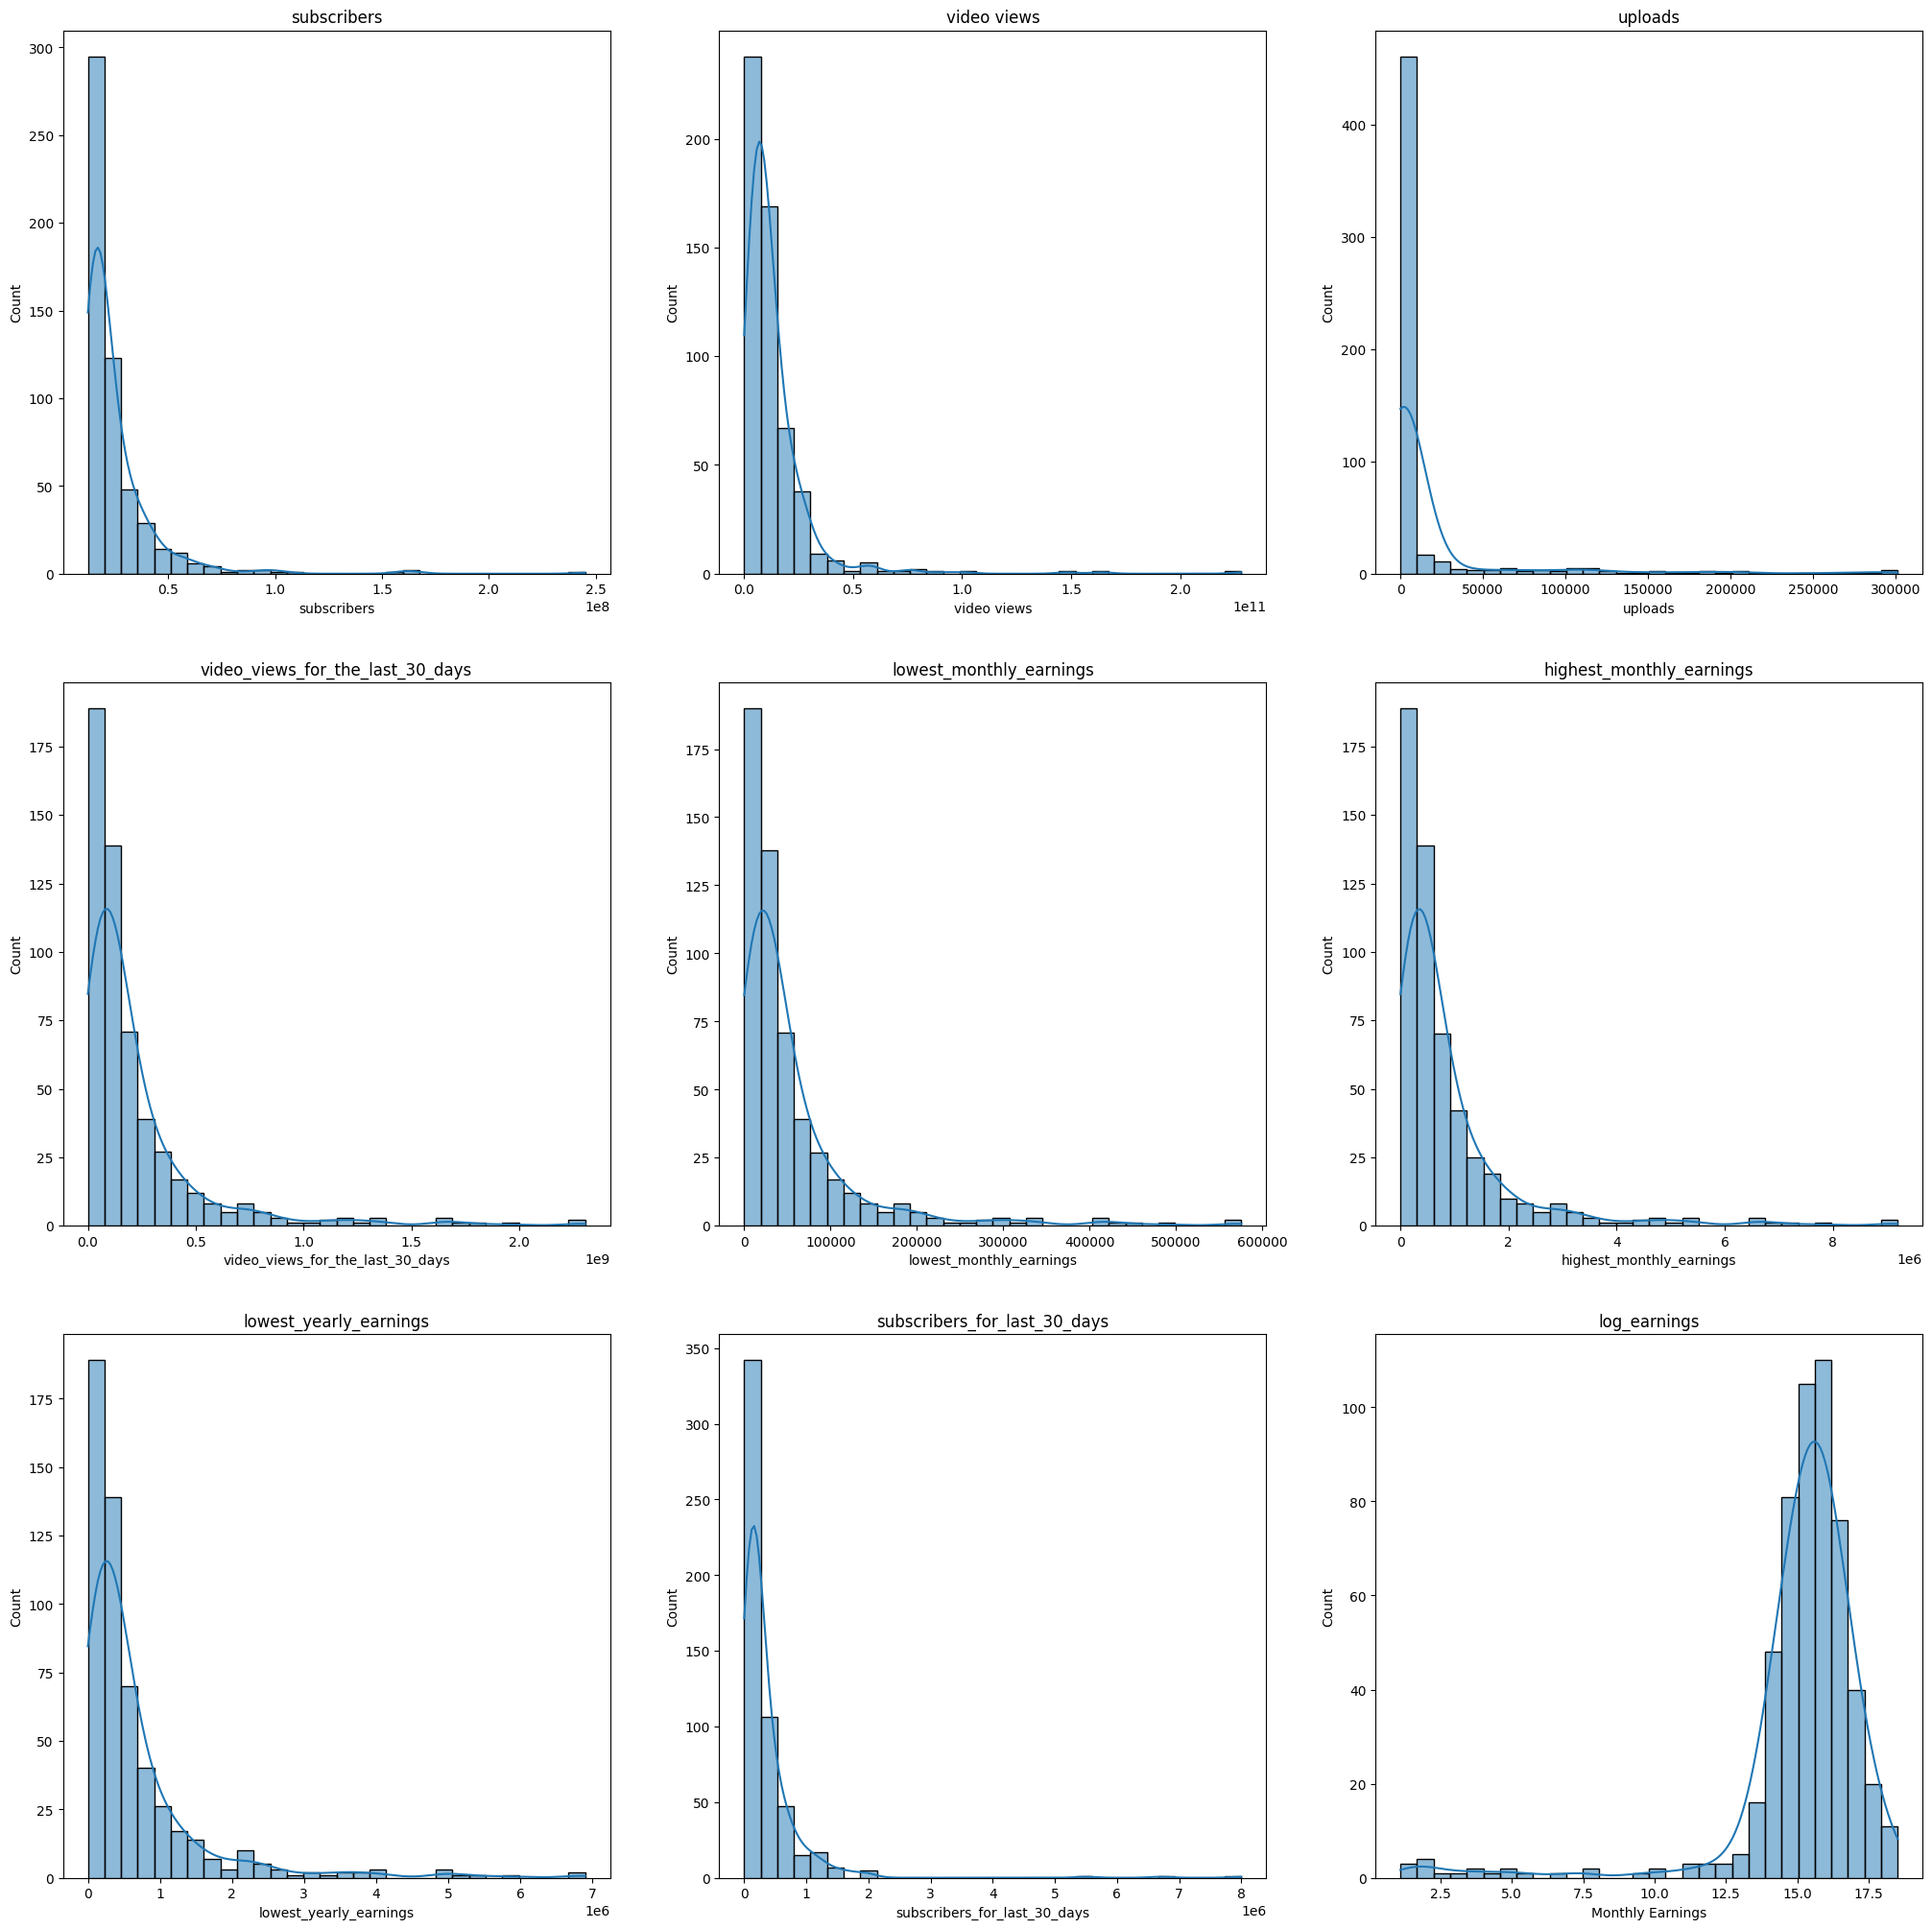

In [423]:
#Distribution of numerical features
# Number of columns in the grid
num_cols = 3

 # Calculate rows
num_rows = -(-len(num_features) // num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 25))
axes = axes.flatten()

# Iterate over the numerical features and create scatter plots
for i, col in enumerate(num_features):
  sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True)
  plt.xlabel("Monthly Earnings")
  plt.ylabel("Count")
  plt.title("Distribution of Monthly Earnings")
  axes[i].set_title(col)

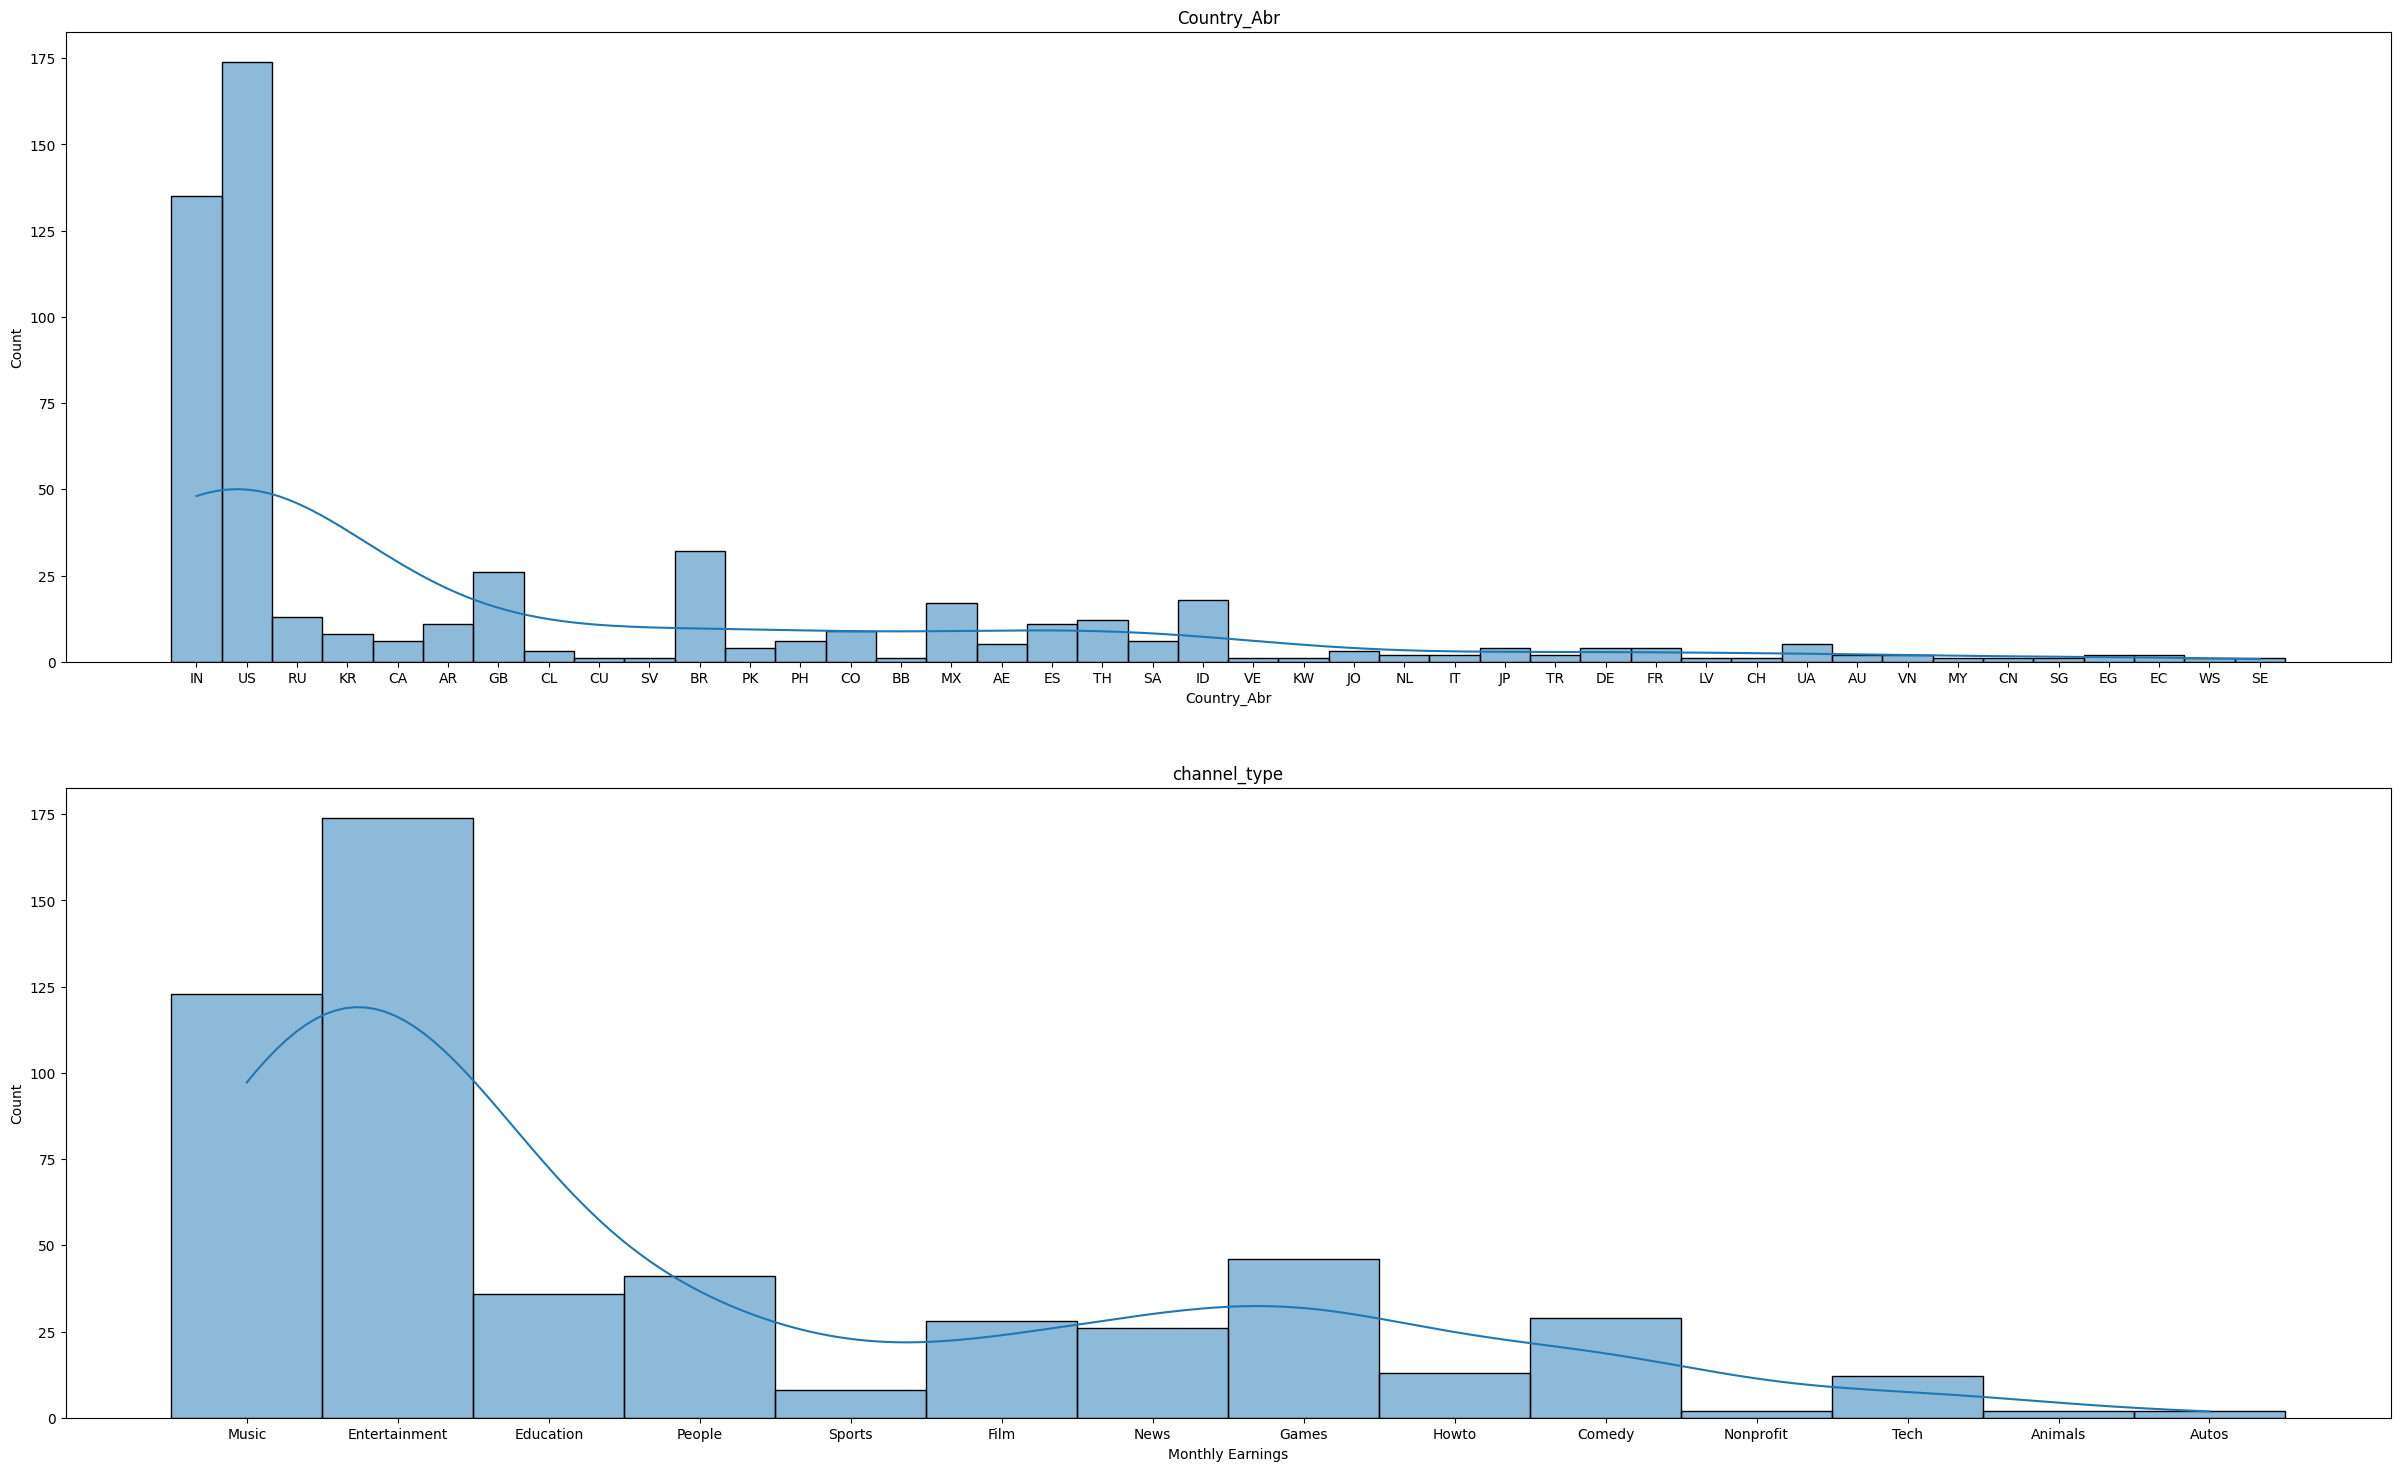

In [408]:
#Distribution of categorical features
# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(30, 18))
axes = axes.flatten()

# Iterate over the numerical features and create scatter plots
for i, col in enumerate(cat_features):
    sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True)
    plt.xlabel("Monthly Earnings")
    plt.ylabel("Count")
    plt.title("Distribution of Monthly Earnings")
    axes[i].set_title(col)

## Relationship betwen features and target

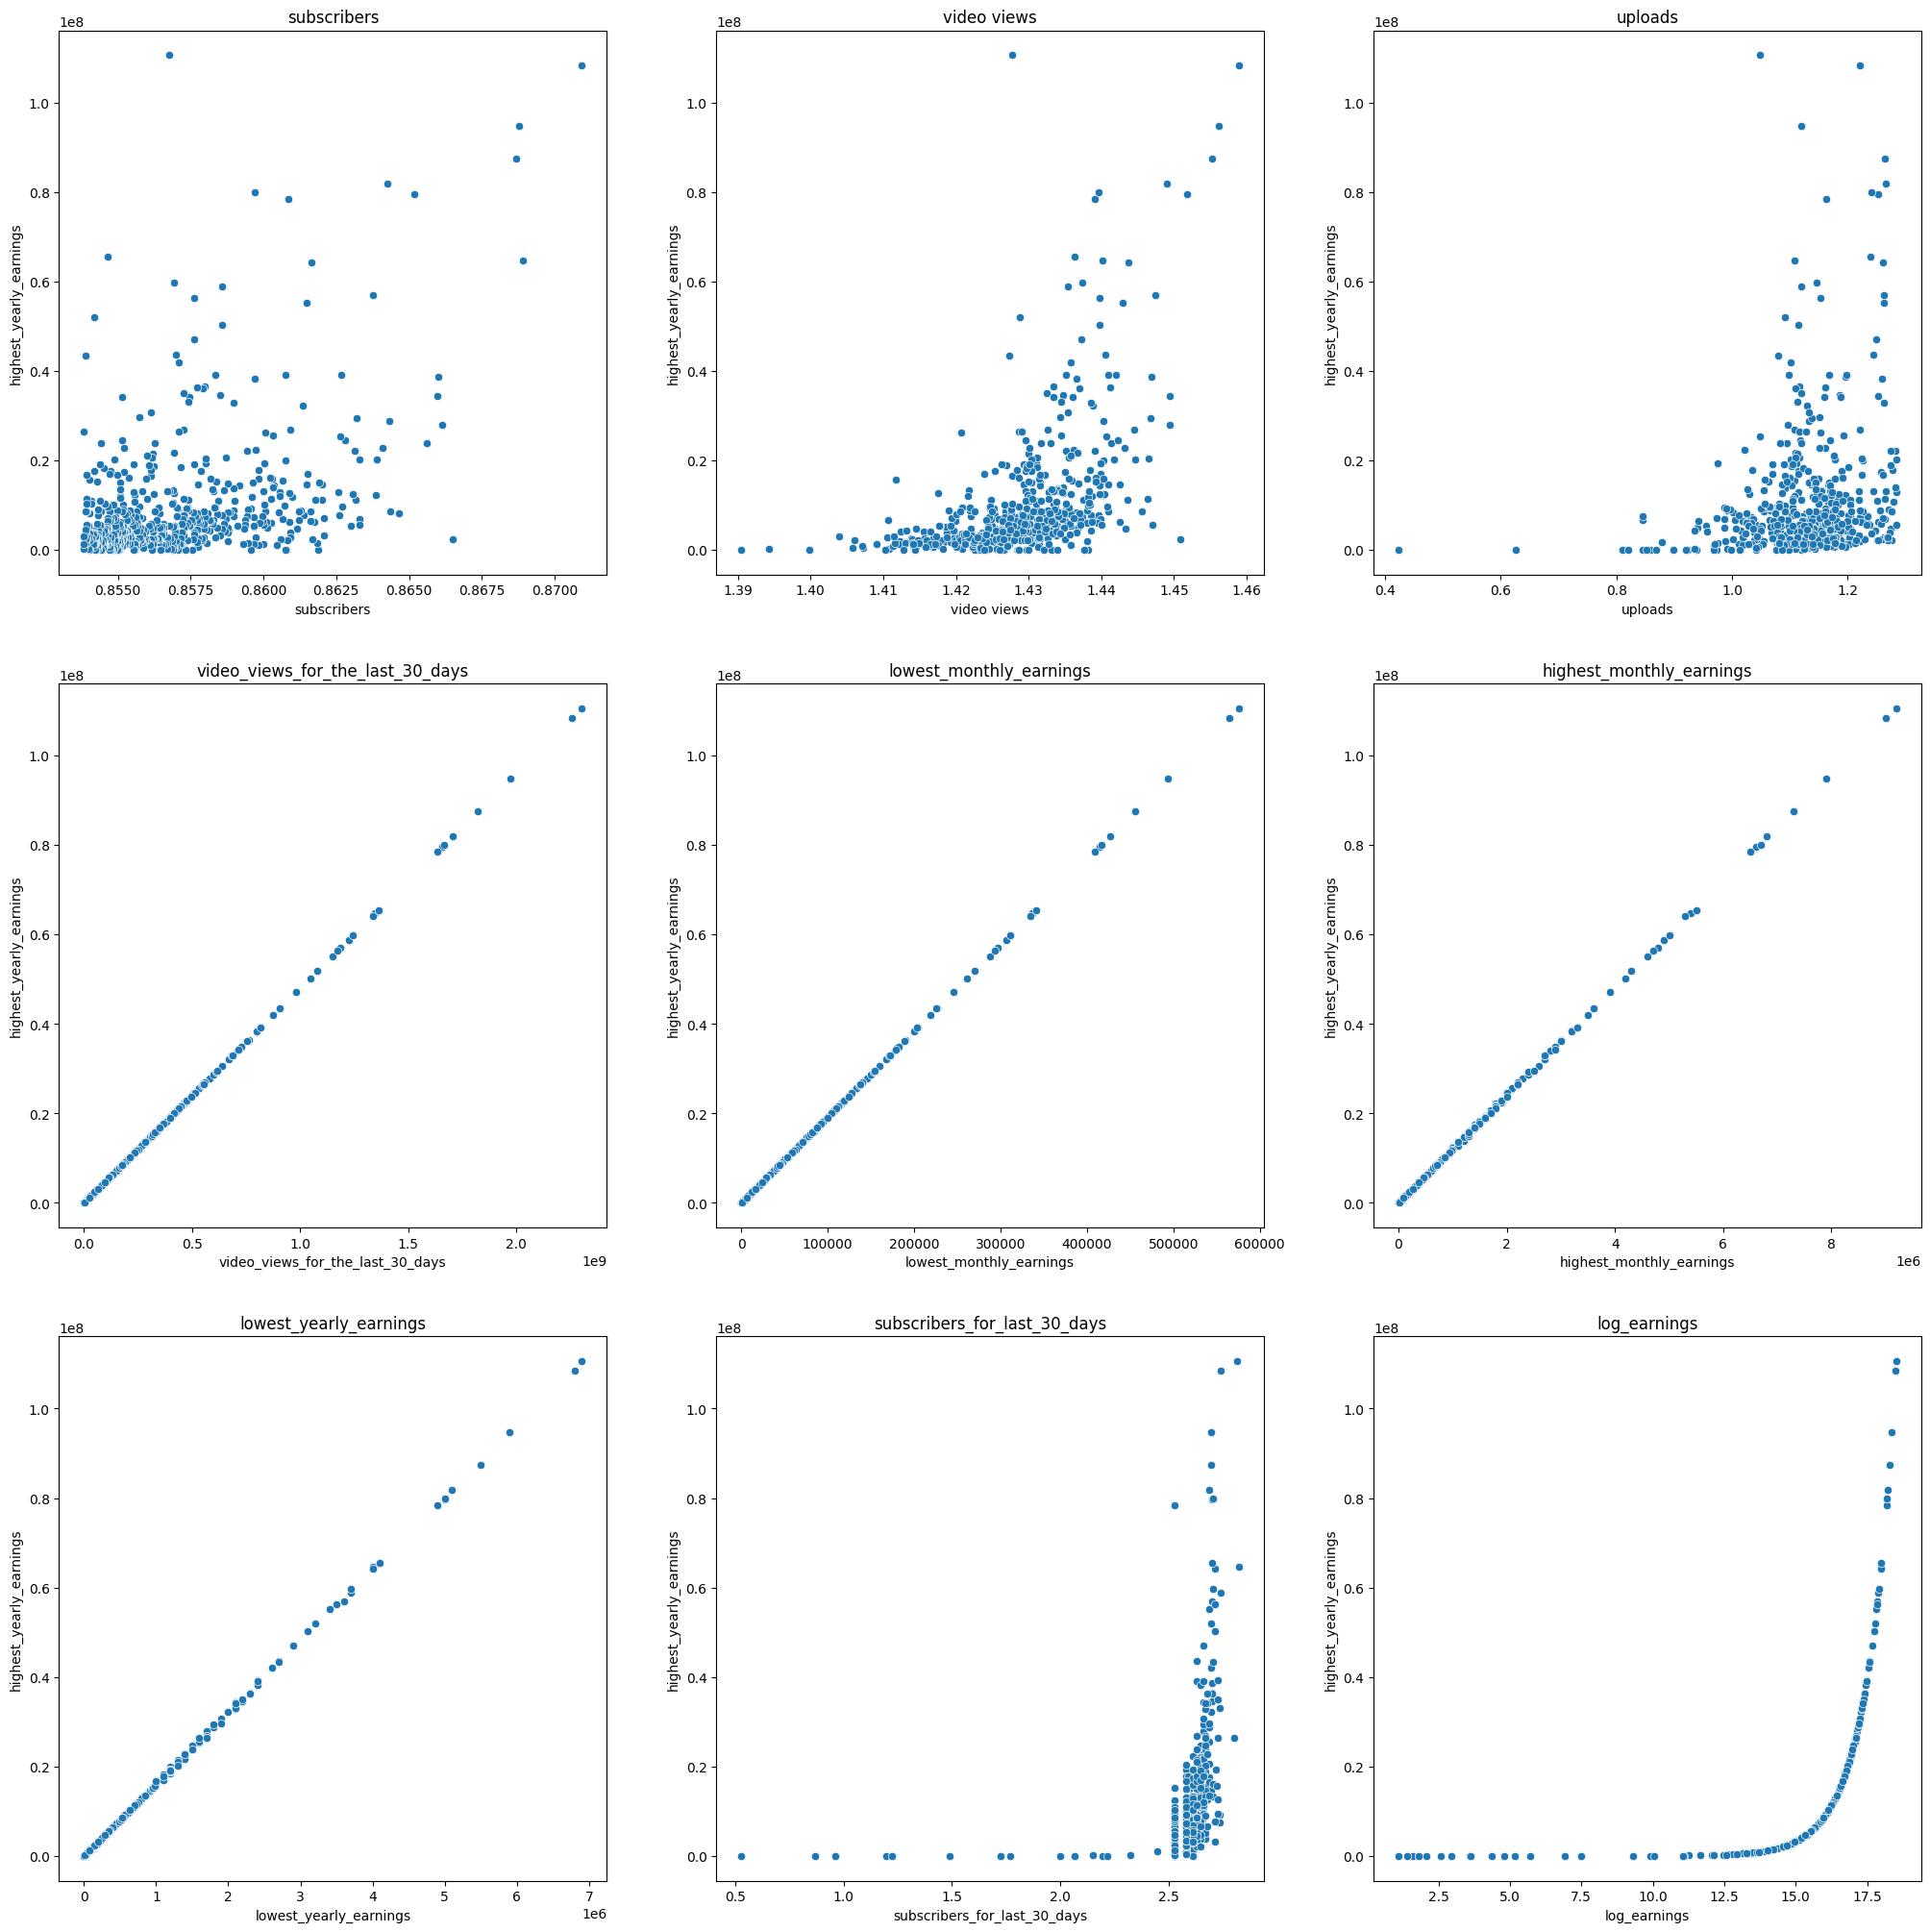

In [491]:
#plot relationship betwee numerical features and target
# Number of columns in the grid
num_cols = 3

 # Calculate rows
num_rows = -(-len(num_features) // num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 25))
axes = axes.flatten()

# Iterate over the numerical features and create scatter plots
for i, col in enumerate(num_features):
    sns.scatterplot(data=df, x=col, y='highest_yearly_earnings', ax=axes[i])
    axes[i].set_title(col)

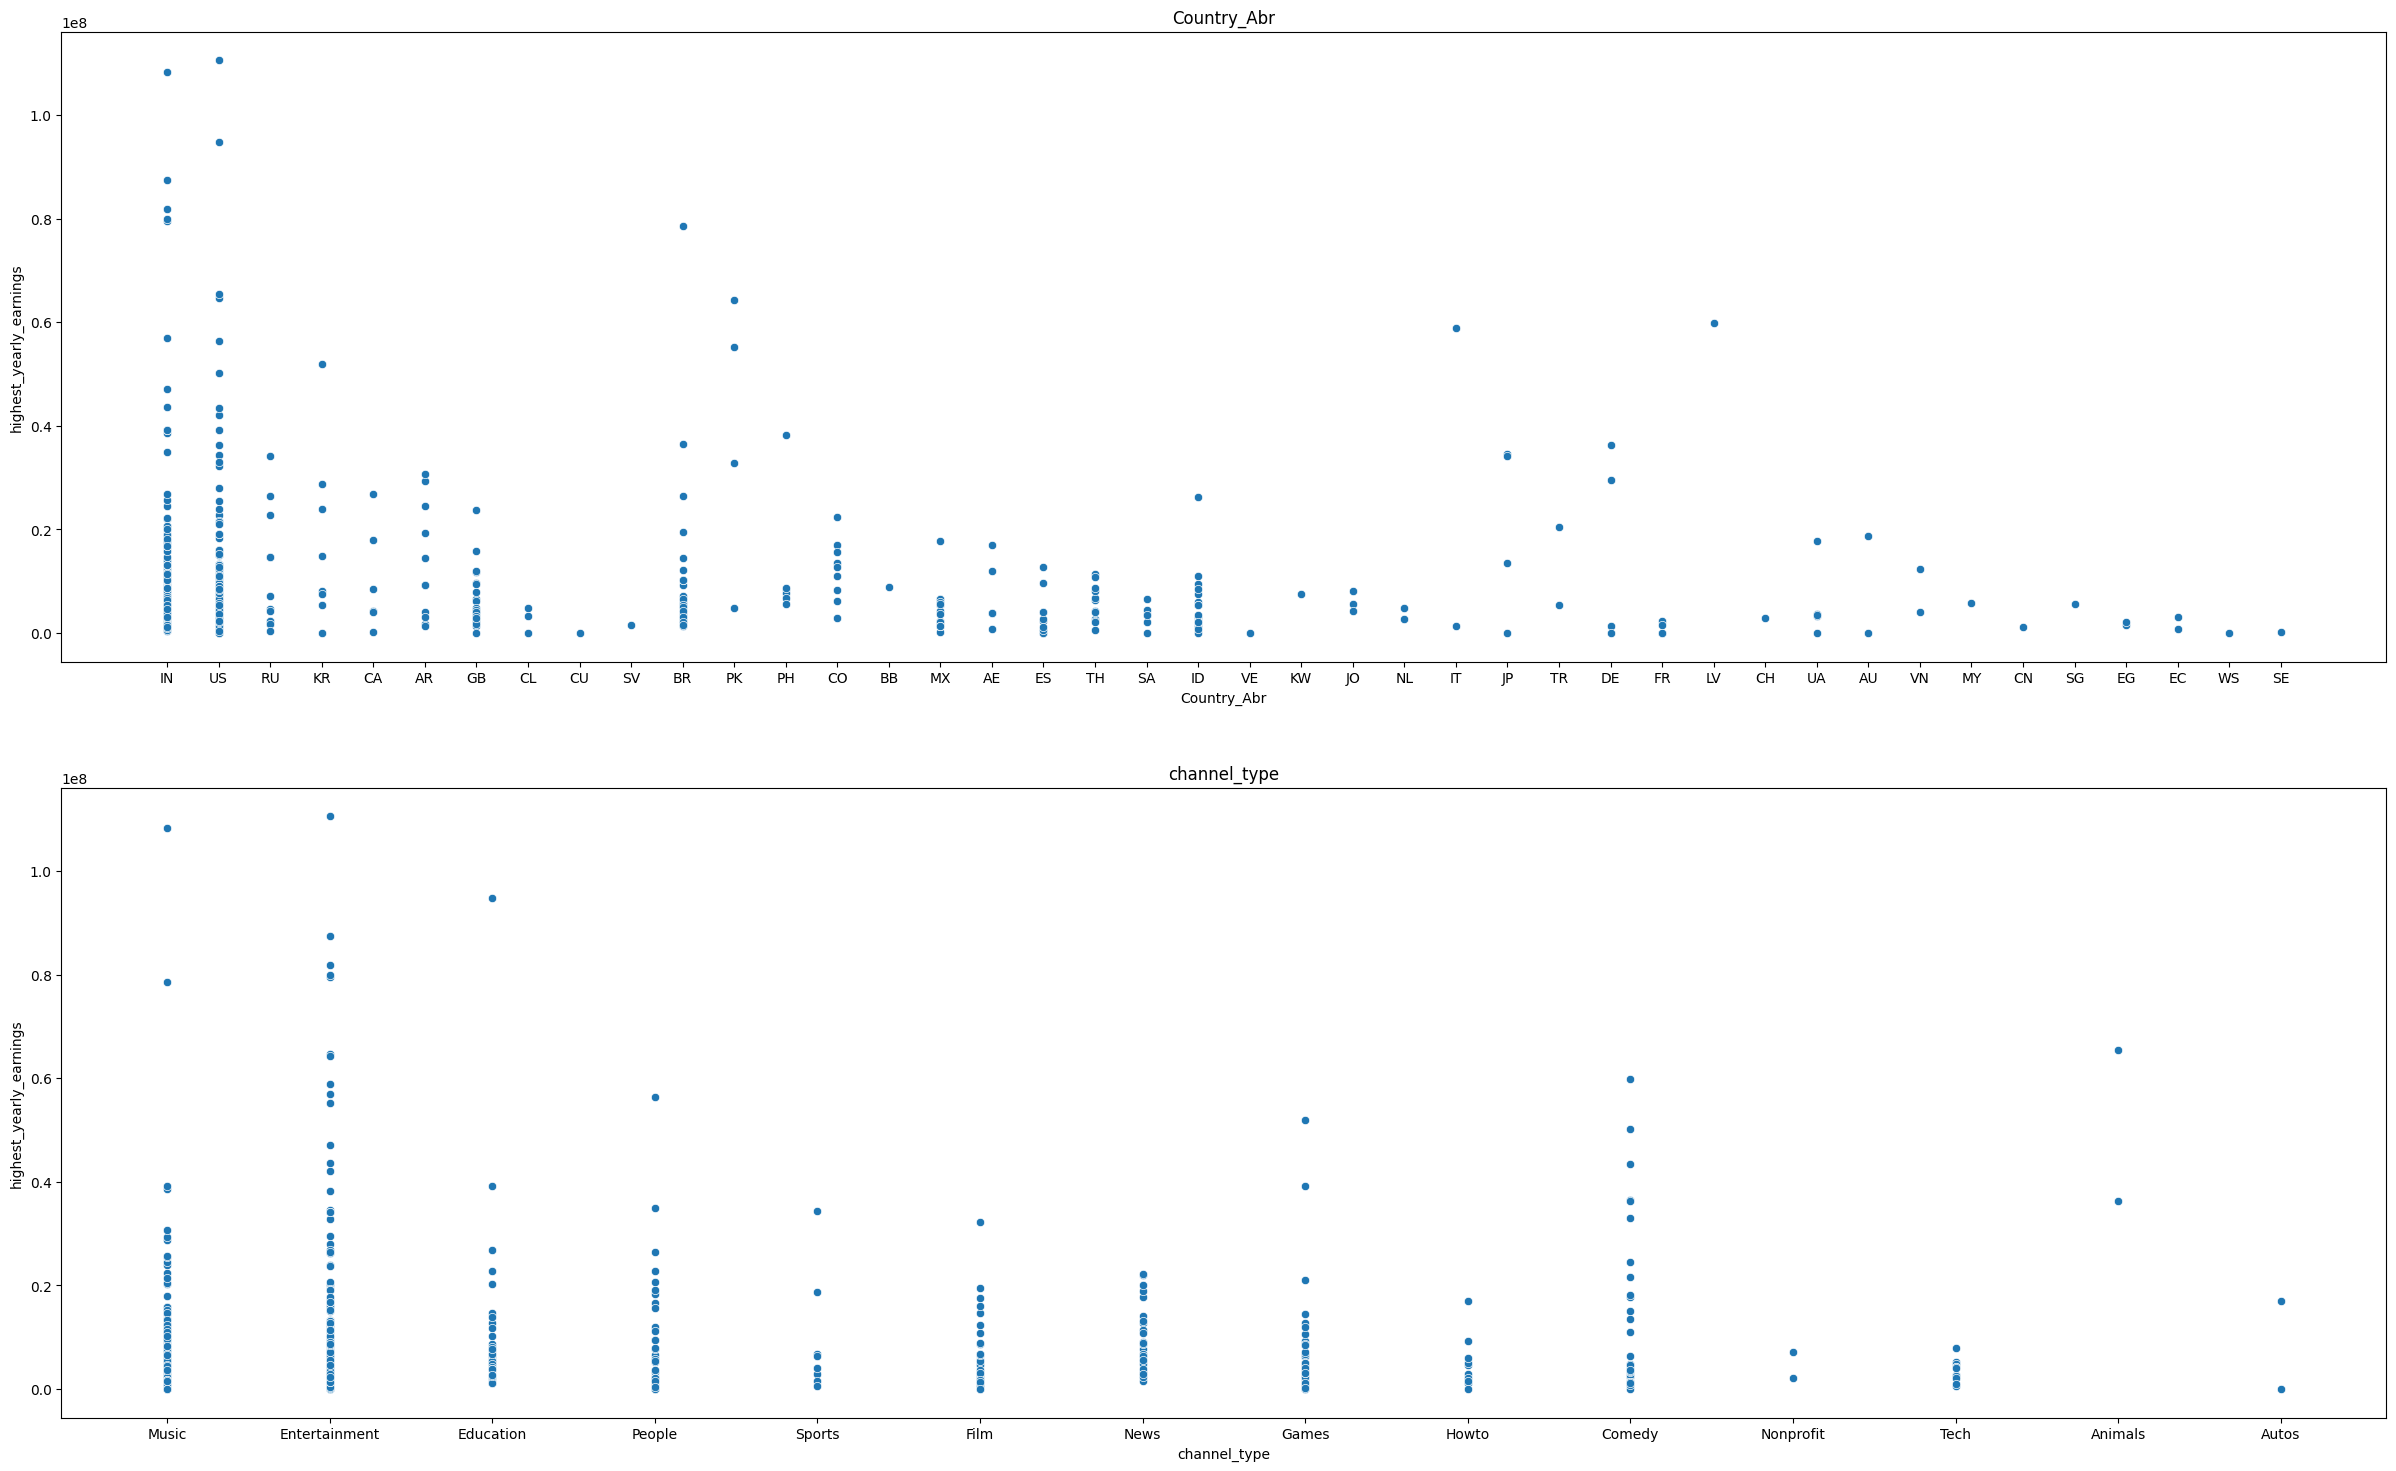

In [410]:
# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(30, 18))
axes = axes.flatten()

# Iterate over the numerical features and create scatter plots
for i, col in enumerate(cat_features):
    sns.scatterplot(data=df, x=col, y='highest_yearly_earnings', ax=axes[i])
    axes[i].set_title(col)

# Modeling

In [411]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

## Baseline

In [453]:
y = df['log_earnings']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

6.154981924875586

## Linear Regression

In [454]:
#create X & y
X = df[['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days',
        'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
        'subscribers_for_last_30_days', 'channel_type','Country_Abr']]
y = df['log_earnings']


#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [492]:
#encode categorcial features
preprocessor = make_column_transformer(
    (OneHotEncoder(drop = 'first', sparse_output = False,handle_unknown='ignore'), cat_features), remainder = 'passthrough'
)

In [459]:
#create pipeline for regression model
pipe = Pipeline([('encode', preprocessor), ('model', LinearRegression())])

In [460]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country_Abr',
                                                   'channel_type'])])),
                ('model', LinearRegression())])

In [462]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.5421478368444347

In [463]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.5207744855885968

In [464]:
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

,0
subscribers,0.041095
video views,0.090902
uploads,0.014118
video_views_for_the_last_30_days,10.570651
lowest_monthly_earnings,2.602559
highest_monthly_earnings,0.458515
lowest_yearly_earnings,0.684804
subscribers_for_last_30_days,0.925291
channel_type,0.001081
Country_Abr,0.001908


## K- Nearest Neighbor

In [472]:
#create X & y
X = df[['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days',
        'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
        'subscribers_for_last_30_days', 'channel_type','Country_Abr']]
y = df['log_earnings']


#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [473]:
#encode categorcial features and standardize numerical features
preprocessor = make_column_transformer(
    (OneHotEncoder(drop = 'first', sparse_output = False,handle_unknown='ignore'), cat_features), remainder = 'passthrough'
)

In [474]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', preprocessor), ('model', KNeighborsRegressor())])

In [475]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [476]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country_Abr',
                                                                          'channel_type'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [477]:
#best parameter
grid_search.best_params_

{'model__n_neighbors': 5}

In [478]:
#use 5 neighbors in model
knn = grid_search.best_estimator_

In [479]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.022462385119000793

In [480]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.0035292385239455194

## Random Forest

In [482]:
#create X & y
X = df[['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days',
        'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
        'subscribers_for_last_30_days', 'channel_type','Country_Abr']]
y = df['log_earnings']


#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [483]:
#encode categorcial features
preprocessor = make_column_transformer(
    (OneHotEncoder(drop = 'first', sparse_output = False,handle_unknown='ignore'), cat_features), remainder = 'passthrough'
)

In [484]:
#create pipeline for random forest regressor model
pipe = Pipeline([('encode', preprocessor), ('model', RandomForestRegressor())])

In [485]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [486]:
#perform grid search with cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Country_Abr',
                                                                          'channel_type'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [487]:
#best parameters
grid_search.best_params_

{'model__max_depth': 5, 'model__n_estimators': 50}

In [488]:
#use max depth of 5 & 50 estimators in model
forest = grid_search.best_estimator_

In [489]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

0.004696085738383767

In [490]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.004923377879628855

In [493]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

,0
subscribers,0.000002
video views,-0.000035
uploads,0.000033
video_views_for_the_last_30_days,0.109334
lowest_monthly_earnings,0.117961
highest_monthly_earnings,0.100728
lowest_yearly_earnings,0.180293
subscribers_for_last_30_days,0.004136
channel_type,0.000027
Country_Abr,-0.000003
